<div class="alert alert-info">

# Objective

The goal of this project is to build a model to <mark>predict influencers</mark> from twitter activity data of users and quantify their potential <mark>financial value</mark>. 

Using the influence scores, we will try to find <mark>top-20 influencers</mark> in a separate tweets dataset.

<div class="alert alert-info">
    
## 1. Predicting Influencers

We will utilize this twitter [dataset](https://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network) to build a model and validate a model that will predict the influencers.
Each observation in the dataset describes two individuals, A and B. There are 11 variables for each person based on Twitter activity, e.g., number of followers, retweets, network characteristics, etc. Each observation shows whether A > B (Choice = “1”) or B > A (Choice = “0”).

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.shape

(5500, 23)

In [4]:
df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


Although not mentioned, it is suspected that in this dataset that the networkfeature1, 2 and 3 are the degree centrality, betweenness centrality and closeness centrality as these are the three popular metrics that are used in the netowrk datasets

### Data Cleaning and preprocessing

#### Checking for null values


In [6]:
df.isnull().sum()

Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

There are no null values in the dataset

<div class= 'alert alert-info'>
    
#### Transforming the independent variables to A-B format to make them interpretable

Old dataframe
|A_follower_count|A_following_count|B_follower_count|B_following_count|
|:-:|:-:|:-:|:-:|
|86|215||102|102|

New dataframe
|follower_count_diff|following_count_diff|
|:-:|:-:|
|-16|113|

In [7]:
df_new=pd.DataFrame()

In [8]:
# df_new['Choice']=df['Choice']
df_new['follower_count_diff']=df['A_follower_count']-df['B_follower_count']
df_new['following_count_diff']=df['A_following_count']-df['B_following_count']
df_new['listed_count_diff']=df['A_listed_count']-df['B_listed_count']
df_new['mentions_received_diff']=df['A_mentions_received']-df['B_mentions_received']
df_new['retweets_received_diff']=df['A_retweets_received']-df['B_retweets_received']
df_new['mentions_sent_diff']=df['A_mentions_sent']-df['B_mentions_sent']
df_new['retweets_sent_diff']=df['A_retweets_sent']-df['B_retweets_sent']
df_new['posts_diff']=df['A_posts']-df['B_posts']
df_new['network_feature_1_diff']=df['A_network_feature_1']-df['B_network_feature_1']
df_new['network_feature_2_diff']=df['A_network_feature_2']-df['B_network_feature_2']
df_new['network_feature_3_diff']=df['A_network_feature_3']-df['B_network_feature_3']

In [9]:
df_new.head()

,follower_count_diff,following_count_diff,listed_count_diff,mentions_received_diff,retweets_received_diff,mentions_sent_diff,retweets_sent_diff,posts_diff,network_feature_1_diff,network_feature_2_diff,network_feature_3_diff
0,-34235,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061
1,-17671,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290
2,3688,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574
3,-19542,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967
4,38035,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036


#### Normalizing all the features to bring all the data values to a common scale

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
df_norm= pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)

In [13]:
#normalised features
df_norm.head()

,follower_count_diff,following_count_diff,listed_count_diff,mentions_received_diff,retweets_received_diff,mentions_sent_diff,retweets_sent_diff,posts_diff,network_feature_1_diff,network_feature_2_diff,network_feature_3_diff
0,0.507400,0.347553,0.510798,0.500196,0.500128,0.447178,0.496772,0.482830,0.501019,0.659024,0.386341
1,0.507632,0.363888,0.511084,0.500224,0.500151,0.516176,0.521014,0.510640,0.501167,0.588358,0.335476
2,0.507932,0.364108,0.512285,0.500213,0.500143,0.531015,0.519267,0.507738,0.501104,0.647840,0.369221
3,0.507606,0.354055,0.512124,0.499956,0.499684,0.329091,0.283996,0.424157,0.500097,0.620181,0.336865
4,0.508414,0.363242,0.514698,0.500258,0.500170,0.637644,0.572905,0.550002,0.501308,0.654856,0.346725


In [34]:
df_norm['target'] = df['Choice']

#### Checking for correlation between features

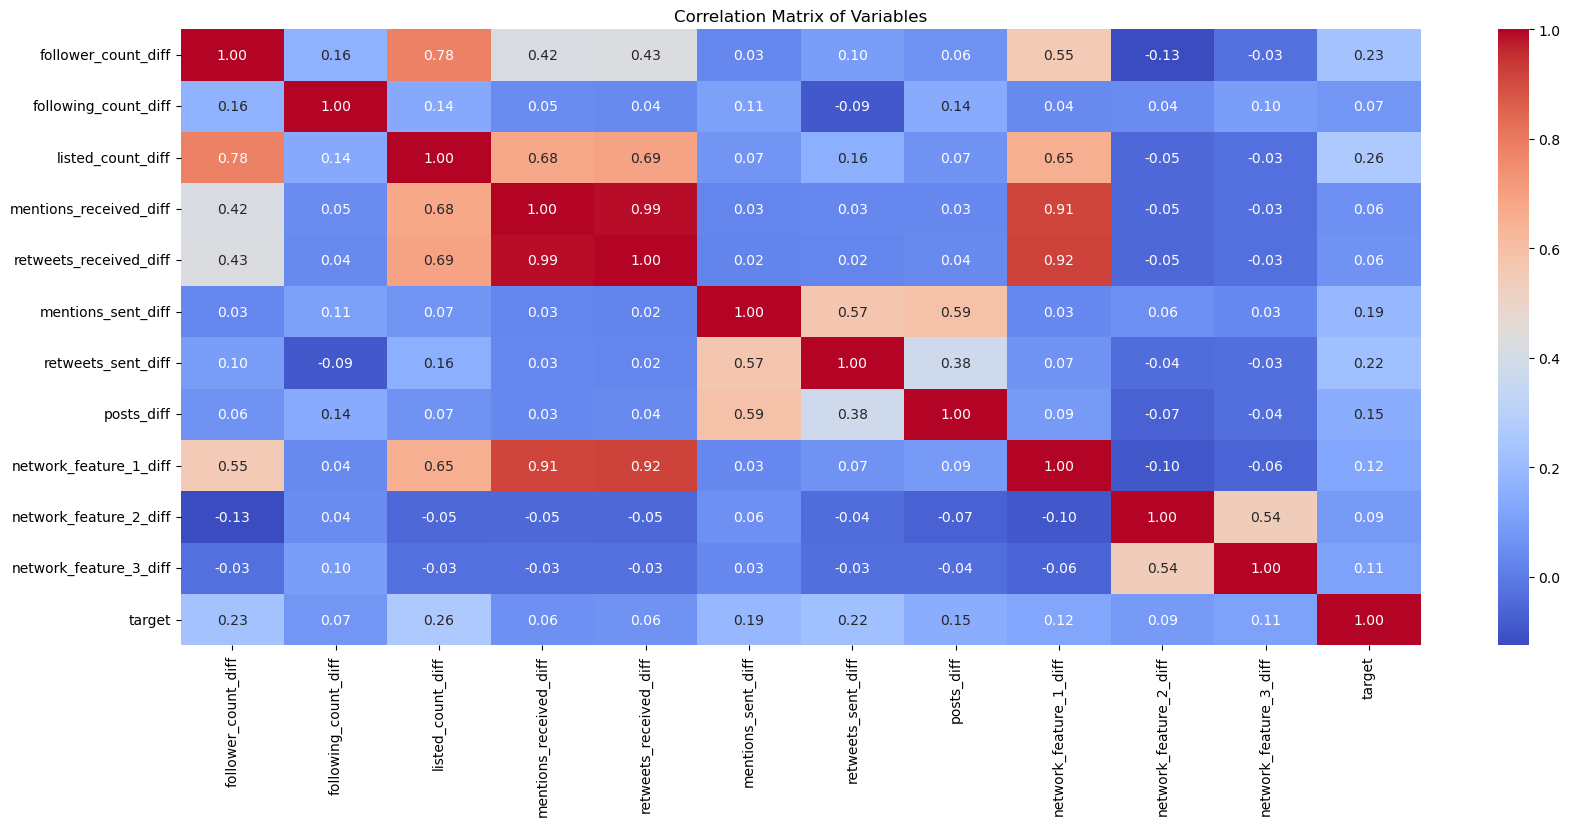

In [35]:
correlation_matrix = df_norm.corr(method='pearson') # can also use spearman or kendall

plt.figure(figsize=(20, 8)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Variables')
plt.show()


From the correlation heatmap, it can be observed that the features: 'network_feature_1_diff', 'mentions_received_diff' and 'retweets_received_diff' have very high positive correlation (>0.9) with the target variable. Therefore, we will drop the other two columns 'mentions_received_diff' and 'retweets_received_diff' keeping 'network_feature_1_diff', which is the degree centrality.


In [36]:
columns=['mentions_received_diff','retweets_received_diff']
df_norm.drop(columns=columns, inplace=True)

## Classification Models

### Model 1:  Logistic Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

Accuracy of Logistic Regression Model on validation set: 67.64%


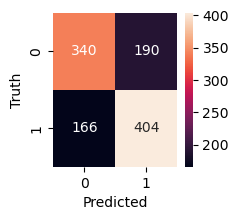

In [48]:
X=df_norm.drop(['target'], axis=1)
y=df_norm['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Logistic Regression Model on validation set: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Model 2: Bagging

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


base_cls = DecisionTreeClassifier(random_state=42)
n_estimators_range = [10, 50, 100, 200, 500]
best_score = 0
best_n_estimators = 0


for n_estimators in n_estimators_range:
    # Initialize the Bagging classifier with the current number of trees
    bagging_cls = BaggingClassifier(estimator=base_cls,n_estimators=n_estimators,random_state=42)

    # Evaluate the bagging classifier using cross-validation
    scores = cross_val_score(bagging_cls, X_train, y_train, cv=5)  # 5-fold cross-validation

    # Calculate the mean score
    mean_score = np.mean(scores)

    # Print the result
    print(f"Number of estimators: {n_estimators}, Cross-Validated Accuracy: {mean_score:.2f}")

    # Update the best_score and best_n_estimators if the current score is better
    if mean_score > best_score:
        best_score = mean_score
        best_n_estimators = n_estimators

# Print the best number of estimators
print(f"The best number of estimators is {best_n_estimators} with a cross-validation score of {best_score:.2f}")


Number of estimators: 10, Cross-Validated Accuracy: 0.74
Number of estimators: 50, Cross-Validated Accuracy: 0.76
Number of estimators: 100, Cross-Validated Accuracy: 0.77
Number of estimators: 200, Cross-Validated Accuracy: 0.77
Number of estimators: 500, Cross-Validated Accuracy: 0.77
The best number of estimators is 100 with a cross-validation score of 0.77


### Fit the best Bagging model on the entire training set

Accuracy of the Bagging Classifier on the validation set: 75.36%


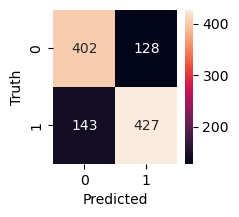

In [54]:
best_bagging_cls = BaggingClassifier(estimator=base_cls,
                                     n_estimators=best_n_estimators,
                                     random_state=42)
best_bagging_cls.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_bag = best_bagging_cls.predict(X_test)

# Evaluate accuracy on the test set
accuracy_bag = accuracy_score(y_test, y_pred_bag)
print(f'Accuracy of the Bagging Classifier on the validation set: {accuracy_bag*100:.2f}%')

cm = confusion_matrix(y_test, y_pred_bag)

plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Model 3: Random Forest

#### RandomTreeClassifier hyperparameter tuning by RandomizedSearchCV

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [63]:
# Using random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [61]:
# best parameters
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [67]:
# save the best random forest model
optimal_rf1 = rf_random.best_estimator_

# Evaluate the Random Forest Classifier
y_pred_rf = optimal_rf1.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy of Random Forest Model on the validation set: {accuracy_rf*100:.2f}%')

Accuracy of Random Forest Model on the validation set: 76.91%


Feature importances from Random Forest Classification Model

In [68]:
feature_scores_rf = pd.Series(optimal_rf1.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores_rf

listed_count_diff         0.257615
network_feature_1_diff    0.180504
follower_count_diff       0.178429
mentions_sent_diff        0.070677
posts_diff                0.069969
network_feature_2_diff    0.062895
network_feature_3_diff    0.061933
retweets_sent_diff        0.059888
following_count_diff      0.058089
dtype: float64

<div class="alert alert-block alert-success">
    <p><b><h3>Best Model:</h3></b><p>
<p><b> Accuracy of Logistic Regression Model: 67.64%</b><p>  
<p><b> Accuracy of Bagging Model: 75.36%</b><p>  
<p><b> Accuracy of Random Forest Model: 76.91%</b><p>
    

<p><b><h4>Therefore, our best model is a Random Forest model with 200 estimators, 10 min_samples_split, 4 min_samples_leaf, 'sqrt' max_features, 20 max_depth and with bootstrap sampling. The accuracy of this model is 76.91%</h4></b>.<p>

   
</div>



Confusion Matrix for the Random Forest Model


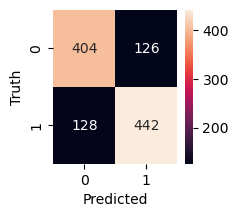

In [69]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(2,2))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print('Confusion Matrix for the Random Forest Model')
plt.show()

<div class="alert alert-block alert-info">
  <p><b><h3>Which factors are best predictors of influence?</h3></b><p>  
 <p>Random Forest is our best model but to find the best predictors of influence, we are using Logistic Regression as it provides better interpretability.<p>
   
</div>



In [70]:
#feature importance from Logistic Regression Model
coefficients = model.coef_[0]

feature_importance_lr=pd.Series(coefficients, index=X_train.columns).sort_values(ascending=False)

feature_importance_lr

follower_count_diff       7.391954
listed_count_diff         5.712535
retweets_sent_diff        4.284029
network_feature_2_diff    2.701191
network_feature_3_diff    2.548791
network_feature_1_diff    2.056541
following_count_diff      1.934663
mentions_sent_diff        1.627347
posts_diff                0.961734
dtype: float64

<Axes: title={'center': 'Feature Importance for Logistic Regression'}>

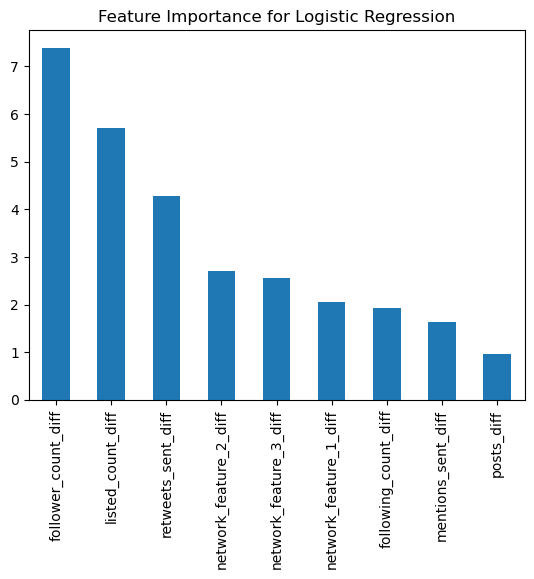

In [71]:
feature_importance_lr.plot(kind='bar', title='Feature Importance for Logistic Regression')

<div class="alert alert-block alert-success">
   <p><b><h3>Top 5 Predictors of Influence:</h3></b><p>
<p>A) <b>follower_count_diff:</b> The difference in follower count is the most influential predictor. This suggests that,    the individual with a significantly higher number of followers is more likely to be considered more influential.<p>
<p>B) <b>listed_count_diff:</b> The difference in how often individuals are listed is the second most important predictor. Being listed may be associated with recognition, so the person who is listed more often may be deemed more influential.<p>
<p>C) <B>retweets_sent_diff:</b> The difference in the number of retweets sent is also an important predictor. This could mean that the individual who actively shares content is considered to be more engaged and thus more influential.<p>
    
<p>D) <b>network_feature_2_diff:</b> The difference in 'betweenness centrality' also has a moderate positive influence. This indicates that individuals who often act as bridges between different network clusters are considered influential.<p>

<p>E) <b>network_feature_3_diff:</b> The difference in 'closeness' also has a moderate positive influence. A higher closeness means an individual can spread information more efficiently through the network, which correlates with influence<p>

***
> In summary, besides the number of <mark>followers</mark>, the frequency of being <mark>listed</mark> and the level of activity (such as <mark>retweets</mark>) among users play significant roles in determining their influence. Additionally, metrics like <mark>betweenness centrality</mark> and <mark>closeness centrality</mark> are also noteworthy factors in assessing influence, as they identify individuals capable of efficiently disseminating information across diverse networks and swiftly connecting disparate groups.
    
<h3>Business Use Case</h3>

Businesses can leverage the insights from this model whenever there is a new product launch or a new Social Media Marketing Campaign by identifying the most influential individuals as predicted by our model who can influence a larger population. This will enable them to maximize their outreach as well as return on investments.



</div>



## Financial Value of the Model

<div class='alert alert-block alert-info'>

#### Assumptions (Model without analytics):

1. Retailer offers $5 to each person (A and B) to tweet once.

2. If an influencer tweets once, there is a 0.01% chance that his/her followers will buy one unit of a product. 

3. The retailer has a profit margin of $10 per unit, and that one customer can buy only one unit.



#### Calculation
Without any analytics, the total cost for each row is $10 ($5 to each person) and the total revenue from each row would (follower_count) * (be 0.01%) * 10. Subrtacting the two quantities will give us profit.


In [72]:
df_foll=df[['Choice','A_follower_count', 'B_follower_count']].copy()
df_foll.head()

,Choice,A_follower_count,B_follower_count
0,0,228,34463
1,0,21591,39262
2,0,7310,3622
3,0,20,19562
4,1,45589,7554


In [73]:
df_foll['profit_without_analytics']=df['Choice']*df['A_follower_count']*0.0001*10 + (1-df['Choice'])*df['B_follower_count']*0.0001*10 - 10
# subtracting 10 (cost of influencers 5+5)
tot_prof_without_analytics=df_foll['profit_without_analytics'].sum()
avg_prof_without_analytics=df_foll['profit_without_analytics'].mean()
print('Without utilizing any analytics, the total profit is:','$' +str(tot_prof_without_analytics))
print('Without utilizing any analytics, the average profit is:','$' +str(avg_prof_without_analytics))

Without utilizing any analytics, the total profit is: $5321568.593
Without utilizing any analytics, the average profit is: $967.5579260000001


<div class='alert alert-block alert-info'>

#### Assumptions (Model with analytics):

1. Retailer offers $10 to those identified as influencers by the model to send two tweets each.

2. If an influencer tweets twice, the overall buying probability will be 0.015%.

3. The retailer has a profit margin of $10 per unit, and that one customer can buy only one unit.



#### Calculation
With analytics, the retailer offers $10 to those identified as influencers by the model to send two tweets each. If the model classifies an individual as a non-influencer, s/he is not selected/paid by the retailer to tweet.


In [77]:
y_pred_rf1 = optimal_rf1.predict(X)

In [78]:
df_foll['Prediction']=y_pred_rf1

In [79]:
df_foll.head()

,Choice,A_follower_count,B_follower_count,profit_without_analytics,Prediction
0,0,228,34463,24.463,0
1,0,21591,39262,29.262,0
2,0,7310,3622,-6.378,0
3,0,20,19562,9.562,0
4,1,45589,7554,35.589,1


In [80]:
df_foll['profit_with_analytics']=df_foll['Prediction']*df['A_follower_count']*0.00015*10 + (1-df_foll['Prediction'])*df['B_follower_count']*0.00015*10 - 10

In [82]:
# if choice == prediction then profit_with_analytics2 = profit_with_analytics else profit_with_analytics2 = -10
df_foll['profit_with_analytics2'] = df_foll.apply(lambda x: x['profit_with_analytics'] if x['Choice'] == x['Prediction'] else -10, axis=1)
df_foll[df_foll['Choice'] != df_foll['Prediction']].head()

,Choice,A_follower_count,B_follower_count,profit_without_analytics,Prediction,profit_with_analytics,profit_with_analytics2
13,0,4321482,224146,214.146,1,6472.2230,-10.0
22,1,356712,871652,346.712,0,1297.4780,-10.0
26,0,2774790,85138,75.138,1,4152.1850,-10.0
36,0,5039,424,-9.576,1,-2.4415,-10.0
40,0,627949,58090,48.090,1,931.9235,-10.0


In [83]:
df_foll.head()

,Choice,A_follower_count,B_follower_count,profit_without_analytics,Prediction,profit_with_analytics,profit_with_analytics2
0,0,228,34463,24.463,0,41.6945,41.6945
1,0,21591,39262,29.262,0,48.8930,48.8930
2,0,7310,3622,-6.378,0,-4.5670,-4.5670
3,0,20,19562,9.562,0,19.3430,19.3430
4,1,45589,7554,35.589,1,58.3835,58.3835


In [84]:
# display in non-scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [94]:
grouped_sums = df_foll.groupby(['Choice', 'Prediction']).agg({'profit_without_analytics': 'sum', 'profit_with_analytics2': 'sum'}).reset_index()


grouped_sums['profit_ratio'] = grouped_sums['profit_with_analytics2']/grouped_sums['profit_without_analytics']
grouped_sums.head()

,Choice,Prediction,profit_without_analytics,profit_with_analytics2,profit_ratio
0,0,0,2657872.003,3998603.004,1.504
1,0,1,122595.355,-3390.000,-0.028
2,1,0,88114.994,-3240.000,-0.037
3,1,1,2452986.241,3691869.361,1.505


In [97]:
tot_prof_with_analytics=df_foll['profit_with_analytics2'].sum()
avg_prof_with_analytics=df_foll['profit_with_analytics2'].mean()
print('Utilizing analytics, the total profit is:','$' +str(tot_prof_with_analytics))
print('Utilizing analytics, the average profit is:','$' +str(avg_prof_with_analytics))


Utilizing analytics, the total profit is: $7683842.365999999
Utilizing analytics, the average profit is: $1397.0622483636362


#### Lift in Profit:

In [98]:
#Lift in Expected Profit by using our model
lift=tot_prof_with_analytics-tot_prof_without_analytics

In [99]:
lift_per=((tot_prof_with_analytics - tot_prof_without_analytics)/tot_prof_without_analytics)*100

In [100]:
print('Increase in Expected Profit by using our model is :','$' +str(lift))
print('Lift in Expected Profit by using our analytical model is :',round(lift_per,2),'%')

Increase in Expected Profit by using our model is : $2362273.772999999
Lift in Expected Profit by using our analytical model is : 44.39 %


#### Profit from Perfect Analytical Model:
A perfect analytical model is the one where every predicted value is same as the 'Choice'. In other words, there are no misclassifications.

In [101]:
df_foll['Perfect_Prediction']=df_foll['Choice']

In [102]:
mask5=df_foll['Perfect_Prediction']==1

In [103]:
A_profit_perfect=df_foll[mask5]['A_follower_count']*0.00015*10-10

In [104]:
A_profit_perfect.sum()

3825661.8525

In [105]:
mask6=df_foll['Perfect_Prediction']==0
B_profit_perfect=df_foll[mask6]['B_follower_count']*0.00015*10-10

In [106]:
B_profit_perfect.sum()

4184191.0369999995

In [107]:
perfect_profit_with_analytics= A_profit_perfect.sum() + B_profit_perfect.sum()
print('Using Perfect Analytics the total profit is:','$' +str(perfect_profit_with_analytics))
print('Using Perfect Analytics the avg profit is:','$' +str(perfect_profit_with_analytics/df_foll.shape[0]))

Using Perfect Analytics the total profit is: $8009852.8895
Using Perfect Analytics the avg profit is: $1456.336889


In [108]:
lift_perfect=((perfect_profit_with_analytics-tot_prof_without_analytics)/tot_prof_without_analytics)*100

In [109]:
print('Using a perfect analytical model, the total profit will be:','$' +str(perfect_profit_with_analytics))
print('Using a perfect analytical model, the avg profit will be:','$' +str(perfect_profit_with_analytics/df_foll.shape[0]))
print('Lift in Expected Profit from the perfect analytical model would be:',round(lift_perfect,2),'%')

Using a perfect analytical model, the total profit will be: $8009852.8895
Using a perfect analytical model, the avg profit will be: $1456.336889
Lift in Expected Profit from the perfect analytical model would be: 50.52 %


In [110]:
# join all the profits into a single dataframe
profits = pd.DataFrame({'Without Analytics': [tot_prof_without_analytics, avg_prof_without_analytics],
                        'With Analytics': [tot_prof_with_analytics, avg_prof_with_analytics],
                        'Perfect Analytics': [perfect_profit_with_analytics, perfect_profit_with_analytics/df_foll.shape[0]]},
                       index=['Total Profit', 'Average Profit'])

profits.head()

,Without Analytics,With Analytics,Perfect Analytics
Total Profit,5321568.593,7683842.366,8009852.889
Average Profit,967.558,1397.062,1456.337


<div class='alert alert-block alert-info'>

# 2. Identifying the top-20 influencers
    
We will utilize another tweets database to identify the top 20 influencers by calculating the influence scores using the weights predicted in the first part.

Methodology to extract the replies, mentions, retweets, and original tweets is as follows:

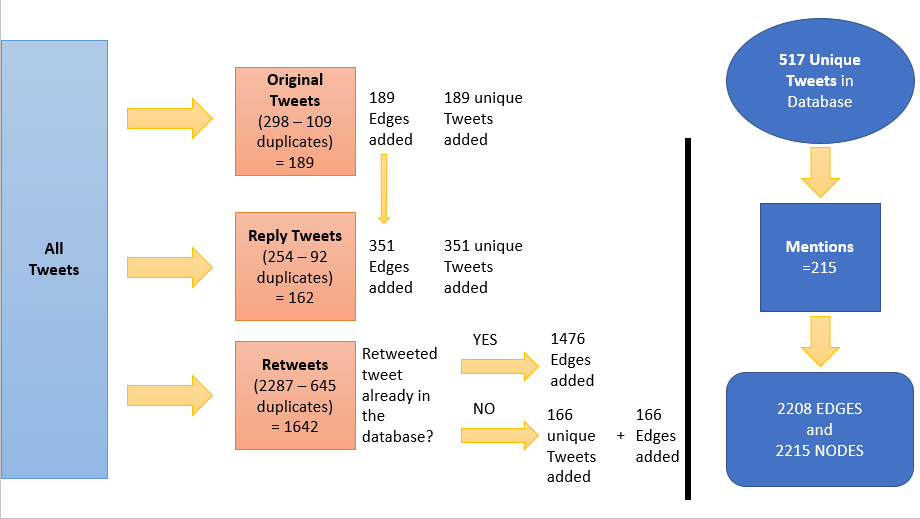

In [112]:
import pandas as pd
import numpy as np
tweets = pd.read_csv('tweets.csv')
tweets.head()

,ids,screen_name,followers,retweet,inreplyto,favorite,friends,listed,location,text
0,1409150000000000000.000,2Sherryazar1956,1992,1,NaN,0,2475,0,NW Arkansas,RT @jimmichael720: Biden doesn't have the ball...
1,1049790000000000000.000,TrueCrimePoli,652,8,NaN,0,846,0,"Boston, MA",RT @ChrisStigall: Biden says\n\nBiden says inf...
2,1357290000000000000.000,WintWahLwin15,118,162,NaN,0,313,0,NaN,"RT @ForeignPolicy: ""A U.S.-India alliance woul..."
3,3617900175.000,england_donald,523,65,NaN,0,263,2,"Florida, USA",RT @CoryMillsFL: While Bidens State Department...
4,1360330000000000000.000,Brenda18291262,280,314,NaN,0,724,0,NaN,RT @Chicago1Ray: If Illegals can file suit on ...


In [113]:
# original tweets = not starting with RT or @ | 298 original tweets
og_tweets = tweets[~tweets['text'].str.startswith(('RT','@'))]

# replies = starting with @ |                   254 replies
rp_tweets = tweets[tweets['text'].str.startswith('@')]

# retweets = starting with RT |                 2287 retweets
rt_tweets = tweets[tweets['text'].str.startswith('RT')]

# DataFrame for storing the edges
edges = pd.DataFrame(columns=['source','destination','type'])

## Original Tweets

In [114]:
og_tweets[' inreplyto'].notnull().sum()
#there are 20 tweets which are made in reply to a user

20

In [115]:
og_tweets.duplicated().sum()
# 109 duplicate entries

109

In [116]:
og_tweets.drop_duplicates(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17224\1792228459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  og_tweets.drop_duplicates(inplace=True)


In [117]:
tweets_dict = {} # dictionary to store the tweets and source-destination info

for index, row in og_tweets.iterrows():

    # Extract tweet text and screen name
    text = row["text"]
    source = row[" screen_name"]

    # Determine destination based on inreplyto value: if NaN then self-loop else reply
    if pd.isna(row[" inreplyto"]):
        destination = source  # self loop
        type = "self loop"
    else:
        destination = row[" inreplyto"]  # reply
        type = "reply"

    # Create the value dictionary with source, destination, and type
    value_dict = {
        "source": source,
        "destination": destination,
        "type": type
    }

    # Add the text-value pair to the main dictionary
    tweets_dict[text] = value_dict
    # add edges to the dataframe
    edges = pd.concat([edges, pd.DataFrame([value_dict])], ignore_index=True)

In [118]:
edges.shape

(189, 3)

In [119]:
edges.tail()

,source,destination,type
184,__aafq,__aafq,self loop
185,MaryZwack,MaryZwack,self loop
186,CharlesOsawa,CharlesOsawa,self loop
187,DesertRiver,DesertRiver,self loop
188,PatrickLizzy3,PatrickLizzy3,self loop


## Replies

In [120]:
rp_tweets.duplicated().sum()
# there are 92 duplicate rows

92

In [121]:
rp_tweets.drop_duplicates(inplace=True)
# 162 unique replies

C:\Users\HP\AppData\Local\Temp\ipykernel_17224\494261809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rp_tweets.drop_duplicates(inplace=True)


In [122]:
tweets_dict_replies = {} # dictionary to store the tweets and source-destination info

for index, row in rp_tweets.iterrows():

    # Extract tweet text and screen name
    text = row["text"]
    source = row[" screen_name"]
    destination = row[" inreplyto"]  # reply
    type = "reply"

    # Create the value dictionary with source, destination, and type
    value_dict = {
        "source": source,
        "destination": destination,
        "type": type
    }

    # Add the text-value pair to the main dictionary
    tweets_dict_replies[text] = value_dict
    # concat edges to the dataframe
    edges = pd.concat([edges, pd.DataFrame([value_dict])], ignore_index=True)

In [123]:
edges.shape

(351, 3)

In [124]:
edges.tail()

,source,destination,type
346,BeebeJayme,Jim_Jordan,reply
347,krisbm2,SnipzPA,reply
348,BernieMiller8,da_wessel,reply
349,AnthonyArmaniS2,KhepryRe,reply
350,a_newsman,georgi_boorman,reply


## Retweets

In [125]:
# combine the tweet dictionary: the keys contains all unique tweets
combined_tweets_dict = {**tweets_dict, **tweets_dict_replies}

In [126]:
rt_tweets.duplicated().sum()
# 645 duplicate rows

645

In [127]:
rt_tweets.drop_duplicates(inplace=True)
# 1642 unique retweets

C:\Users\HP\AppData\Local\Temp\ipykernel_17224\3176428408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_tweets.drop_duplicates(inplace=True)


In [128]:
def extract_original_tweet_username(text):
  # Check if the text starts with "RT @"
  if text.startswith("RT @"):
    # Extract the username
    username_end_index = text.find(":")
    username = text[4:username_end_index]  # extract from index 4 up to the colon

    # Extract the Original Tweet
    # Find the first space after the username and colon
    space_index = text.find(" ", 4) # check after the 4th index
    if space_index != -1:
      # Return the text after the space
      return text[space_index + 1:], username

  # Otherwise, return the original text
  return text, None

In [131]:
def partial_match(retweeted_tweet, dictionary_of_tweets):
  for key in dictionary_of_tweets.keys():
    # Calculate the minimum length for 50% match
    min_length = max(len(retweeted_tweet), len(key)) // 2

    # Check if the starting characters of 'retweeted_tweet' match the starting characters of 'key' up to the minimum length
    if retweeted_tweet[:min_length] == key[:min_length]:
      return True
  return False

In [132]:
# add the original tweet and the original author to the retweet dataframe
for i, row in rt_tweets.iterrows():
  tweet, user = extract_original_tweet_username(row['text'])
  rt_tweets.at[i, 'og_tweet'] = tweet
  rt_tweets.at[i, 'og_tweeter'] = user

C:\Users\HP\AppData\Local\Temp\ipykernel_17224\3361680136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_tweets.at[i, 'og_tweet'] = tweet
C:\Users\HP\AppData\Local\Temp\ipykernel_17224\3361680136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_tweets.at[i, 'og_tweeter'] = user


In [133]:
rt_tweets.head()

,ids,screen_name,followers,retweet,inreplyto,favorite,friends,listed,location,text,og_tweet,og_tweeter
0,1409150000000000000.000,2Sherryazar1956,1992,1,NaN,0,2475,0,NW Arkansas,RT @jimmichael720: Biden doesn't have the ball...,Biden doesn't have the balls to rescue strande...,jimmichael720
1,1049790000000000000.000,TrueCrimePoli,652,8,NaN,0,846,0,"Boston, MA",RT @ChrisStigall: Biden says\n\nBiden says inf...,Biden says\n\nBiden says inflation is transito...,ChrisStigall
2,1357290000000000000.000,WintWahLwin15,118,162,NaN,0,313,0,NaN,"RT @ForeignPolicy: ""A U.S.-India alliance woul...","""A U.S.-India alliance would give China pause ...",ForeignPolicy
3,3617900175.000,england_donald,523,65,NaN,0,263,2,"Florida, USA",RT @CoryMillsFL: While Bidens State Department...,While Bidens State Department focuses on gende...,CoryMillsFL
4,1360330000000000000.000,Brenda18291262,280,314,NaN,0,724,0,NaN,RT @Chicago1Ray: If Illegals can file suit on ...,If Illegals can file suit on the (U.S) Govt fo...,Chicago1Ray


In [134]:
count = 0 # counting how many new tweets we add to our database

for i, row in rt_tweets.iterrows():
    # if the retweeted tweet is already there in the dictionary of tweets just add the edges
  if partial_match(row['og_tweet'], combined_tweets_dict):

    source = row[" screen_name"]
    destination = row["og_tweeter"]
    type = "retweet"

    value_dict = {
        "source": source,
        "destination": destination,
        "type": type
    }
    # add the edge
    edges = pd.concat([edges, pd.DataFrame([value_dict])], ignore_index=True)

  else:
    # if the retweeted tweet is new then add the tweet in the dictionary and add the edges
    text = row['og_tweet']
    source = row[" screen_name"]
    destination = row["og_tweeter"]
    type = "retweet"

    value_dict = {
        "source": source,
        "destination": destination,
        "type": type
    }

    combined_tweets_dict[text] = value_dict # add tweet to dictionary
    edges = pd.concat([edges, pd.DataFrame([value_dict])], ignore_index=True) # add edge
    count+=1

In [135]:
print(f'A total of {count} tweets are added in the combined dictionary')

A total of 166 tweets are added in the combined dictionary


In [136]:
edges.shape

(1993, 3)

## Mentions

In [137]:
import re

In [138]:
count=0

# iterate over all the unique tweets in the database
for k,v in combined_tweets_dict.items():
    # if tweet is a reply: ignore the first mention

    if k.startswith('@'): # if a tweet starts with @ i.e. it's a reply
        pattern = r'@(\w+)\b' # match all usernames after @
        all_mention_usernames = re.findall(pattern, k) # match all usernames

        # iterate over all usernames, except the first username to whom the reply was intended and add edges
        for username in all_mention_usernames[1:]:
            source = v['source']
            destination = username
            type = "mention"

            value_dict = {"source": source,
                          "destination": destination,
                          "type": type}

            edges = pd.concat([edges, pd.DataFrame([value_dict])], ignore_index=True)
            count+=1

    else:
        pattern = r'@(\w+)\b' # match all usernames after @
        all_mention_usernames = re.findall(pattern, k) # match all usernames

        # iterate over all usernames, except the first username to whom the reply was intended and add edges
        for username in all_mention_usernames[1:]:
            source = v['source']
            destination = username
            type = "mention"

            value_dict = {
                "source": source,
                "destination": destination,
                "type": type}

            edges = pd.concat([edges, pd.DataFrame([value_dict])], ignore_index=True)
            count+=1

In [139]:
count

215

In [140]:
edges.shape

(2208, 3)

## Network Visualization

In [141]:
import networkx as nx
import matplotlib.pyplot as plt

In [142]:
# Create a directed graph from the dataframe
G = nx.from_pandas_edgelist(edges, 'source', 'destination', create_using=nx.DiGraph())

# Calculate the degree centrality for each node (for a DiGraph it will be the sum of in_degree and out_degree)
# degree_dict = {node: val for node, val in G.degree()}
degree_dict = nx.degree_centrality(G)

# Calculate betweenness centrality for each node
betweenness_dict = nx.betweenness_centrality(G)

# Calculate closeness centrality for each node
closeness_dict = nx.closeness_centrality(G)

# Convert the dictionaries to dataframes
degree_df = pd.DataFrame(degree_dict.items(), columns=['Node', 'Degree Centrality'])
betweenness_df = pd.DataFrame(betweenness_dict.items(), columns=['Node', 'Betweenness Centrality'])
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['Node', 'Closeness Centrality'])

# Merge the dataframes into a single dataframe
metrics_df = degree_df.merge(betweenness_df, on='Node').merge(closeness_df, on='Node')

In [31]:
from IPython.display import IFrame
IFrame("https://embed.kumu.io/c3a0851f45afac91ee62f7c0277b9418", 900,500)

Visualizing the network

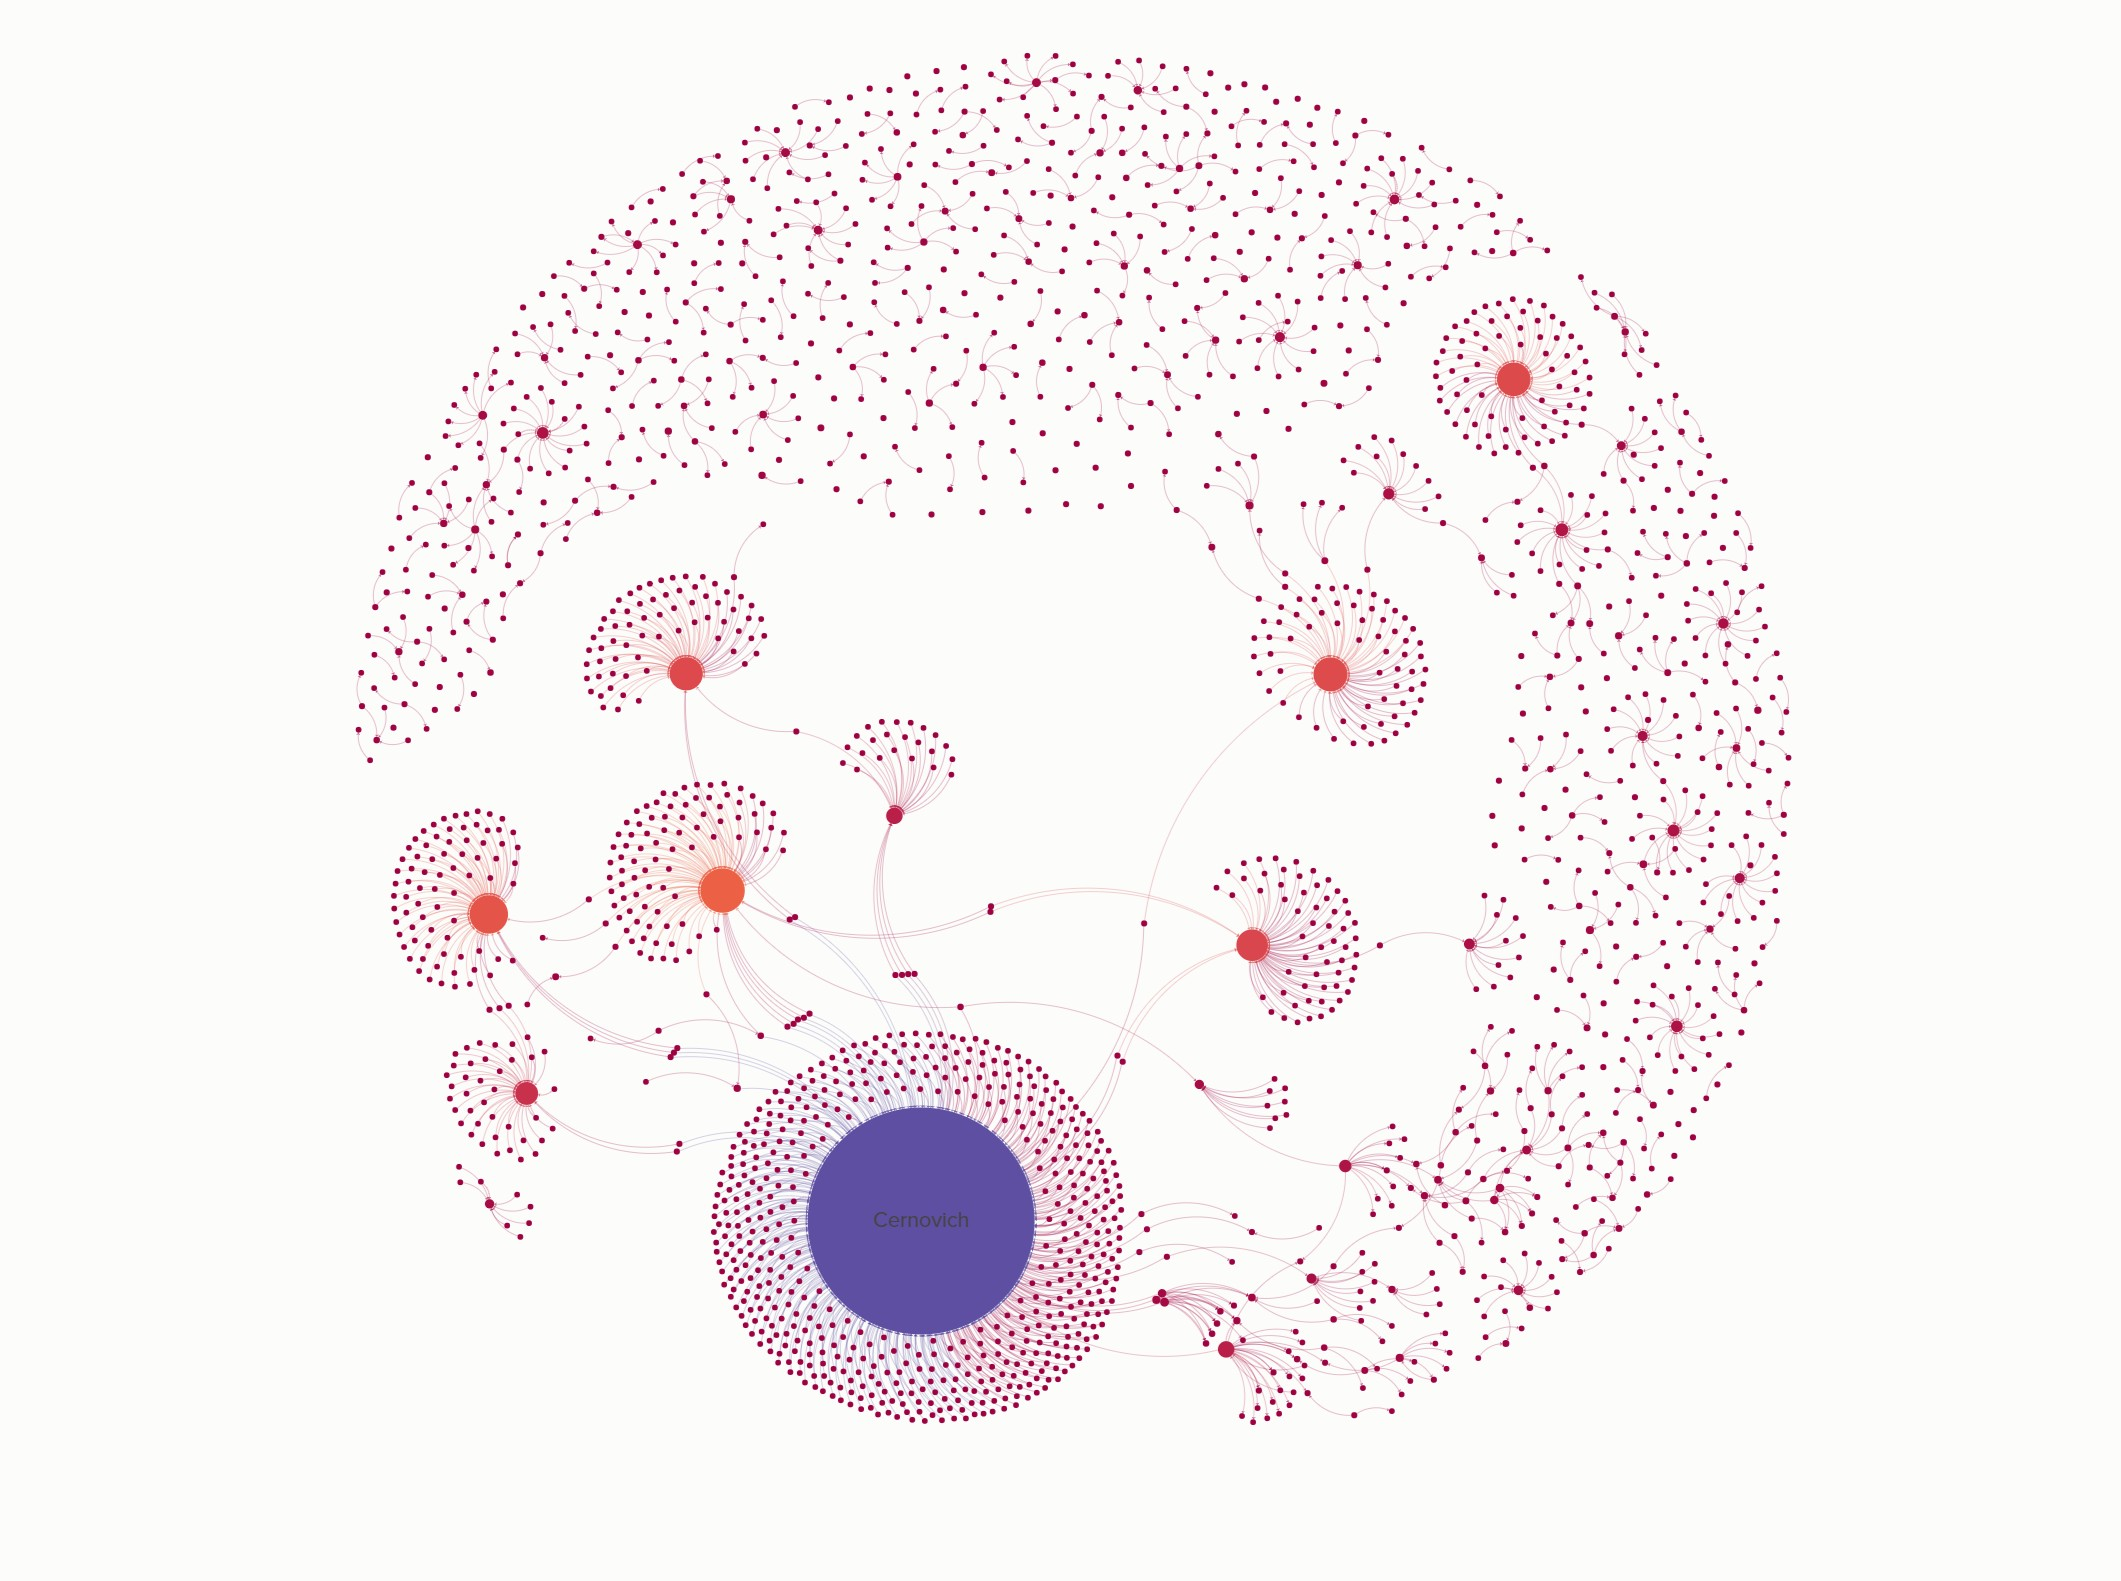

## Top-20 Influencers as per weights

To find the top influencers, we used the feature importance weights from our Random Forest Model since it has the highest prediction accuracy. We use the degree, betweenness and closeness weights to calculate the influence score of each influencer

In [143]:
feature_scores_rf

listed_count_diff        0.258
network_feature_1_diff   0.181
follower_count_diff      0.178
mentions_sent_diff       0.071
posts_diff               0.070
network_feature_2_diff   0.063
network_feature_3_diff   0.062
retweets_sent_diff       0.060
following_count_diff     0.058
dtype: float64

In [144]:
metrics_df[:5]

,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,ChrisStigall,0.001,0.000,0.000
1,MirageNewsCom,0.001,0.000,0.000
2,ConservaivGenie,0.001,0.000,0.000
3,Kevin26346219,0.001,0.000,0.000
4,_Crazytwist_,0.001,0.000,0.000


Since the scales of degree, betweenness and closenss vary, we normalise them to treat all of them equally.

In [145]:
# Select numeric columns
numeric_cols = metrics_df.select_dtypes(include=[np.number])

# Normalize numeric columns
normalized_df = (numeric_cols - numeric_cols.min()) / (numeric_cols.max() - numeric_cols.min())

# We can use the calculated influence score to find the most influential people from the network
# Multiply with the given weights
weights = np.array([0.181, 0.063, 0.062])
weighted_scores = normalized_df.dot(weights)

# Add scores to the DataFrame
metrics_df['Influencer Score'] = weighted_scores

In [146]:
metrics_df.sort_values(by='Influencer Score', ascending=False)[:5].reset_index(drop=True)

,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,Influencer Score
0,Cernovich,0.251,0.000,0.251,0.243
1,dYu7vug97v2Qcqh,0.011,0.000,0.001,0.071
2,Chicago1Ray,0.044,0.000,0.044,0.043
3,RepFranklin,0.037,0.000,0.037,0.036
4,seanhannity,0.033,0.000,0.032,0.031


In [147]:
metrics_df[['Node', 'Influencer Score']].sort_values(by='Influencer Score', ascending=False)[:20].reset_index(drop=True)

,Node,Influencer Score
0,Cernovich,0.243
1,dYu7vug97v2Qcqh,0.071
2,Chicago1Ray,0.043
3,RepFranklin,0.036
4,seanhannity,0.031
5,mikepompeo,0.031
6,HawleyMO,0.030
7,Jereme45,0.028
8,RepLeeZeldin,0.019
9,dcexaminer,0.018
